## Constructing an energy matrix using Linear regression and MCMC 

The code in this tutorial is released under the [MIT License](https://opensource.org/licenses/MIT). All the content in this notebook is under a [CC-by 4.0 License](https://creativecommons.org/licenses/by/4.0/). 

In [1]:
import pandas as pd

import regseq.information
import regseq.inference
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Activate a setting that causes all plots to be inside the notebook rather than in pop-ups.
%matplotlib inline
# Get svg graphics from the notebook
%config InlineBackend.figure_format = 'svg' 

We will first load in a data set in a format accepted by the analysis software.

During this experiment, we measure the frequencies of mutant promoters in the libraries via sequencing, which we label as 'ct_0'. We also measure the number mRNA counts produced by each mutant promoter via sequencing, which we label 'ct_1'. 

We then format the resulting dataset into a format usable by the data analysis software. The dataset must have the columns 'ct', 'ct_0', 'ct_1', and 'seq' where 'ct' is the total number of reads, and 'seq' is the sequence of the mutant promoter. 

We will declare the path where all the data for this notebook is stored. It can be downloaded from the
website under 'datasets' or from the github repo (in the datasets folder).

We will look at the aphA gene in a low oxygen growth condition. This is what the first few lines of a typical data set looks like. From the few sequences displayed below
Sequence 2 has the highest expression level as 9 mRNA counts were measured while only 1 library
count was found indicating its average expression is likely to be high.

In [2]:
emat = np.loadtxt("../data/inference_results/bdcR_Anaero_LS_mut_inf.txt")
len(emat)

160

We then need to fit the effect of mutation from the data. For illustration purposes we now show how this can be done using linear regression.

We can now plot the results. We will see the effect of mutation on expression.

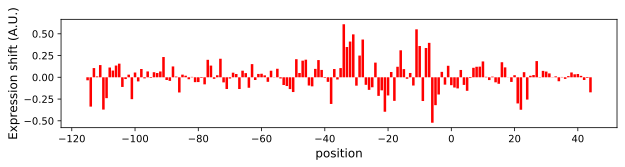

In [3]:
fig,ax = plt.subplots(figsize=(10,2))
ax.set_ylabel('Expression shift (A.U.)',fontname='DejaVu Sans',fontsize=12)
ax.set_xlabel('position',fontname='DejaVu Sans',fontsize=12)
plt.bar(range(-115,-115+160),emat,color='r')
plt.show()

We will now convert the expression shift into an information footprint. The conversion script returns the information footprint smoothed with a window size = 3
(the values are averaged with their neighbors), and also a variable called shiftcolors. Shiftcolors is
a colorcoding scheme for showing whether mutation tends to increase gene expression (repressor like) or
decrease gene expression (activator like).

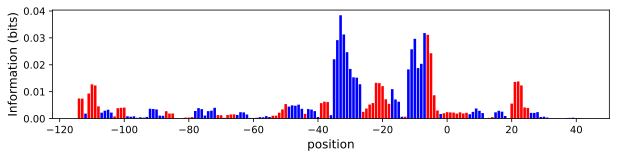

In [4]:
p = regseq.viz.footprint("../data/inference_results/bdcR_Anaero_LS_mut_inf.txt")

In [5]:
file = "../data/inference_results/bdcR_Anaero_LS_mut.csv"

In [6]:
file.split("/")[-1].split("_")[0]

'bdcR'

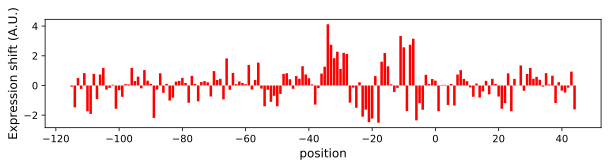

In [7]:
q = regseq.information.emat_to_information(file)
fig,ax = plt.subplots(figsize=(10,2))
ax.set_ylabel('Expression shift (A.U.)',fontname='DejaVu Sans',fontsize=12)
ax.set_xlabel('position',fontname='DejaVu Sans',fontsize=12)
plt.bar(range(-115,-115+160),q,color='r')
plt.show()

Finally, here are the versions of packages used in this notebook. To display the versions, we are using the Jupyter Lab extension `watermark`, which can be found [here](https://github.com/rasbt/watermark).

<module 'matplotlib.pyplot' from '/opt/anaconda3/envs/mpathic_env/lib/python3.6/site-packages/matplotlib/pyplot.py'>

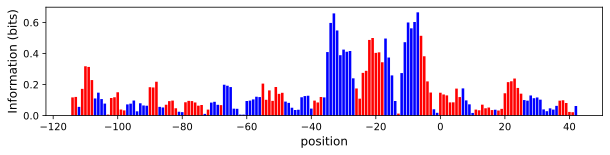

In [8]:
regseq.viz.footprint_from_emat(file, output_file=None)

## Computing Environment

In [9]:
%load_ext watermark
%watermark -v -p jupyterlab,numpy,pandas,sklearn,scipy,regseq,seaborn,matplotlib

CPython 3.6.9
IPython 7.13.0

jupyterlab not installed
numpy 1.18.1
pandas 1.0.3
sklearn 0.22.1
scipy 1.4.1
regseq 0.0.2
seaborn 0.10.1
matplotlib 3.1.3
